In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tqdm import trange
from sklearn.model_selection import cross_val_score, KFold, train_test_split

plt.style.use('seaborn-darkgrid')
mpl.rcParams['figure.figsize'] = [10.0, 4.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['font.size'] = 18

In [2]:
parameter_names = ["Country", "Happiness Rank", "Happiness", "Economy", "Family", "Health", "Freedom", "Trust", "Generosity"]

In [5]:
data_df_2017 = pd.read_csv("../data/2017.csv")
data_df_2016 = pd.read_csv("../data/2016.csv")
data_df_2015 = pd.read_csv("../data/2015.csv")

In [6]:
data_df_2017 = data_df_2017.rename(columns = {"Happiness.Rank" : "Happiness Rank",
                             "Happiness.Score" : "Happiness",
                             "Economy..GDP.per.Capita." : "Economy",
                             "Health..Life.Expectancy." : "Health",
                             "Trust..Government.Corruption." : "Trust"})

In [7]:
data_df_2016 = data_df_2016.rename(columns = {"Happiness.Rank" : "Happiness Rank",
                             "Happiness Score" : "Happiness",
                             "Economy (GDP per Capita)" : "Economy",
                             "Health (Life Expectancy)" : "Health",
                             "Trust (Government Corruption)" : "Trust"})

In [8]:
data_df_2015 = data_df_2015.rename(columns = {"Happiness.Rank" : "Happiness Rank",
                             "Happiness Score" : "Happiness",
                             "Economy (GDP per Capita)" : "Economy",
                             "Health (Life Expectancy)" : "Health",
                             "Trust (Government Corruption)" : "Trust"})

In [9]:
data_df_2015 = data_df_2015[parameter_names]
data_df_2016 = data_df_2016[parameter_names]
data_df_2017 = data_df_2017[parameter_names]

In [10]:
data_df_2015["Country"] += "_2015"
data_df_2016["Country"] += "_2016"
data_df_2017["Country"] += "_2017"

In [11]:
data_df = pd.concat([data_df_2015, data_df_2016, data_df_2017])
data_df = data_df.reset_index(drop=True)
data_df.to_pickle("../data/world_happiness.pickle")
data_df

,Country,Happiness Rank,Happiness,Economy,Family,Health,Freedom,Trust,Generosity
0,Switzerland_2015,1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780
1,Iceland_2015,2,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300
2,Denmark_2015,3,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390
3,Norway_2015,4,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990
4,Canada_2015,5,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110
...,...,...,...,...,...,...,...,...,...
465,Rwanda_2017,151,3.471,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756
466,Syria_2017,152,3.462,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664
467,Tanzania_2017,153,3.349,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256
468,Burundi_2017,154,2.905,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435


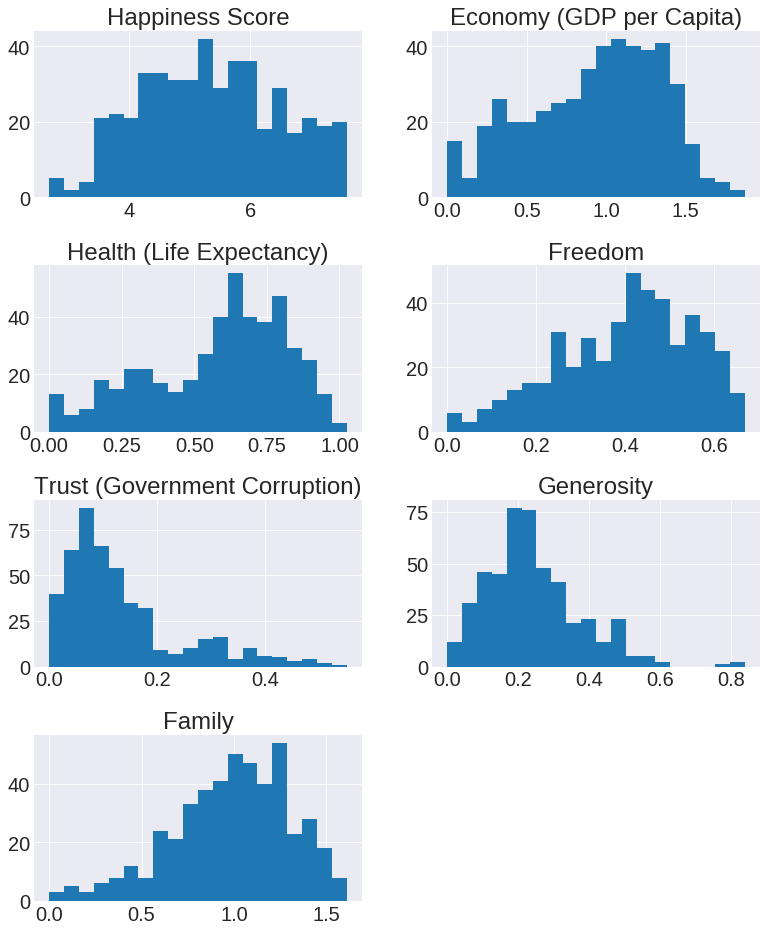

In [23]:
fig, ax = plt.subplots(4, 2, figsize=(10,12))
ax[0,0].hist(data_df["Happiness"], bins=20); ax[0,0].set_title("Happiness Score")
ax[0,1].hist(data_df["Economy"], bins=20); ax[0,1].set_title("Economy (GDP per Capita)")
ax[1,0].hist(data_df["Health"], bins=20); ax[1,0].set_title("Health (Life Expectancy)")
ax[1,1].hist(data_df["Freedom"], bins=20); ax[1,1].set_title("Freedom")
ax[2,0].hist(data_df["Trust"], bins=20); ax[2,0].set_title("Trust (Government Corruption)")
ax[2,1].hist(data_df["Generosity"], bins=20); ax[2,1].set_title("Generosity");
ax[3,0].hist(data_df["Family"], bins=20); ax[3,0].set_title("Family");
ax[3,1].axis("off");
plt.tight_layout()
plt.savefig("../figs/WH_data_hist.pdf")

In [14]:
corr = data_df[parameter_names[2:]].corr()[::-1]

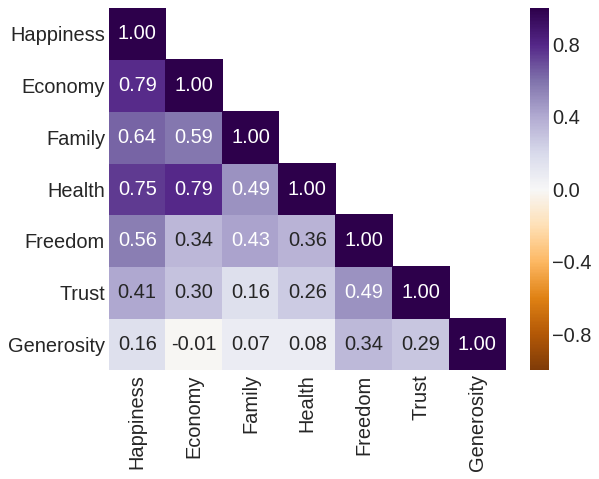

In [15]:
with sns.axes_style("white"):
    plt.figure(figsize=(8,6))
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask, k=1)] = True
    sns.heatmap(corr, mask=mask[::-1], annot=True, fmt=".2f", cmap="PuOr", vmin=-1, vmax=1)
    plt.ylim(0.0, 7.0);
#plt.tight_layout()
plt.savefig("../figs/WH_corr_mat.pdf", bbox_inches="tight")